# Exmaple

Model the joint volatility of “300760.XSHE(迈瑞医疗)” and “000796.XSHE(凯撒旅业)”  by vech GARCH, CCC and DCC.

In [1]:
import vgarch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#upload data
data=pd.read_csv("datapro.csv")
#select the columns we are going to use in the subsequent analysis
data=data[["order_book_id","date","close"]]
#drop nan values
data.dropna(inplace=True)
data

,order_book_id,date,close
0,000002.XSHG,2000/1/4,1494.49
1,000002.XSHG,2000/1/5,1498.04
2,000002.XSHG,2000/1/6,1555.94
3,000002.XSHG,2000/1/7,1611.80
4,000002.XSHG,2000/1/10,1642.52
...,...,...,...
11395,000796.XSHE,2021/12/3,7.40
11396,000796.XSHE,2021/12/6,7.12
11397,000796.XSHE,2021/12/7,7.11
11398,000796.XSHE,2021/12/8,7.15


In [3]:
stock_data={}
for code,df in data.groupby("order_book_id"):
    df["return"]=df["close"].pct_change()
    df["returnSquare"]=df["return"]**2
    df.dropna(inplace=True)
    df=df.set_index(pd.to_datetime(df["date"]))
    stock_data[code]=df

In [4]:
data={"r1":stock_data["300760.XSHE"]["return"],"r2":stock_data["000796.XSHE"]["return"]}
datpd.DataFrame(data).dropna()

In [5]:
data.head()

,r1,r2
date,,
2018-10-17,0.100043,0.004959
2018-10-18,0.047477,-0.052632
2018-10-19,0.100037,0.039931
2018-10-22,0.100033,0.033389
2018-10-23,-0.033475,0.000000


### VECH GARCH

VECH．GARCH(1，1) Model:

$$\left[\begin{array}{ll}
\sigma_{11,t}^{2} & \sigma_{12,t} \\
\sigma_{12,t} & \sigma_{22,t}^{2}
\end{array}\right]=\left[\begin{array}{ll}
a_{1} & a_{2} \\
a_{2} & a_{3}
\end{array}\right]+\left[\begin{array}{ll}
\alpha_{1} & \alpha_{2} \\
\alpha_{2} & \alpha_{3}
\end{array}\right] \cdot\left[\begin{array}{lc}
u_{1 t-1}^{2} & u_{1 t-1} u_{2 t-1} \\
u_{1 t-1} u_{2 t-1} & u_{2 t-1}^{2}
\end{array}\right]+\left[\begin{array}{ll}
\beta_{1} & \beta_{2} \\
\beta_{2} & \beta_{3}
\end{array}\right] \cdot\left[\begin{array}{ll}
\sigma_{11,t-1}^{2} & \sigma_{12,t-1} \\
\sigma_{12,t-1} & \sigma_{22,t-1}^{2}
\end{array}\right]$$

In [7]:

    vol1 = vgarch.VECH()
    est1 = vol1.fit(data)
    pre1.append(vol1.predict(1)[:,0,1][0])

C:\Users\wly\AppData\Roaming\Python\Python39\site-packages\scipy\optimize\_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


In [8]:
vol1.params

array([9.99598724e-05, 9.99598724e-05, 5.05289252e-04, 1.04012765e-02,
       1.04012765e-02, 1.04012765e-02, 8.99635204e-01, 7.99675737e-01,
       9.00040533e-01])

The estimation result is :

$$\left[\begin{array}{ll}
\sigma_{11,t}^{2} & \sigma_{12,t} \\
\sigma_{12,t} & \sigma_{22,t}^{2}
\end{array}\right]=\left[\begin{array}{ll}
0.000099 & 0.000099 \\
0.000099 & 0.000595
\end{array}\right]+\left[\begin{array}{ll}
0.0104 & 0.0104 \\
0.0104 & 0.0104
\end{array}\right] \cdot\left[\begin{array}{lc}
u_{1 t-1}^{2} & u_{1 t-1} u_{2 t-1} \\
u_{1 t-1} u_{2 t-1} & u_{2 t-1}^{2}
\end{array}\right]+\left[\begin{array}{ll}
0.8996 & 0.7997 \\
0.7997 & 0.9000
\end{array}\right] \cdot\left[\begin{array}{ll}
\sigma_{11,t-1}^{2} & \sigma_{12,t-1} \\
\sigma_{12,t-1} & \sigma_{22,t-1}^{2}
\end{array}\right]$$

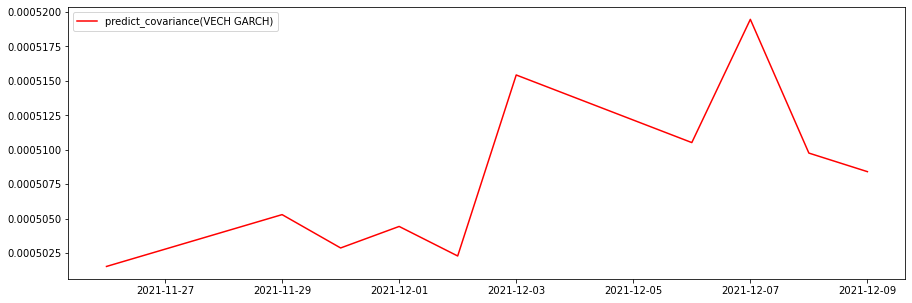

In [9]:
plt.figure(figsize=(15,5))
x=test.index
plt.plot(x,pre1,'r',label='predict_covariance(VECH GARCH)')
plt.legend()
plt.show()

### CCC

$$H_{t}=\left[\begin{array}{cc}
\sigma_{1,t} & 0 \\
0 & \sigma_{2, t}
\end{array}\right]\left[\begin{array}{cc}
1 & \rho \\
\rho & 1
\end{array}\right]\left[\begin{array}{cc}
\sigma_{1, t} & 0 \\
0 & \sigma_{2 m, t}
\end{array}\right]$$

Where

$$\sigma_{1, t}^{2}=\omega_{1}+\alpha_{1} \cdot r_{1, t-1}^{2}+\beta_{1} \cdot \sigma_{1, t-1}^{2}$$

$$\sigma_{2, t}^{2}=\omega_{2}+\alpha_{2} \cdot r_{2, t-1}^{2}+\beta_{2} \cdot \sigma_{2, t-1}^{2}$$

In [10]:
pre2=[]
for i in range(10):
    data=df[:-10+i]
    vol2 = vgarch.CCC()
    est2 = vol2.fit(data)
    pre2.append(vol2.predict(1)[:,0,1][0])

In [11]:
vol2.params

[array([3.60905901e-05, 4.75550973e-02, 8.04281876e-01]),
 array([1.39312371e-04, 1.12176814e-01, 5.50211705e-01])]

The estimation result is :

$$\sigma_{1, t}^{2}=0.000036+0.0476 \cdot r_{1, t-1}^{2}+0.804 \cdot \sigma_{1, t-1}^{2}$$

$$\sigma_{2, t}^{2}=0.000139+0.1122 \cdot r_{2, t-1}^{2}+0.5502 \cdot \sigma_{2, t-1}^{2}$$

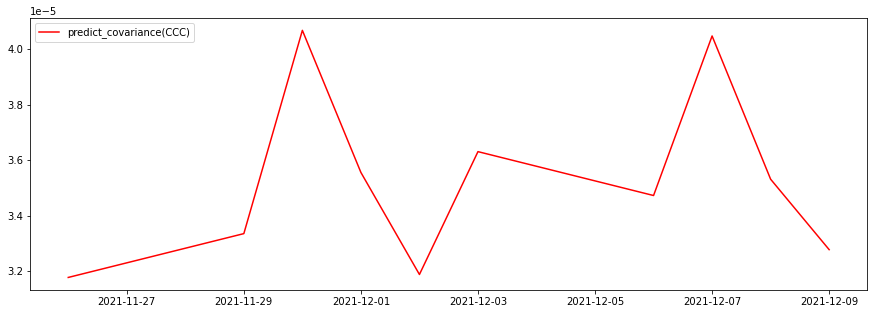

In [12]:
plt.figure(figsize=(15,5))
x=test.index
plt.plot(x,pre2,'r',label='predict_covariance(CCC)')
plt.legend()
plt.show()

### DCC

$$H_{t}=\left[\begin{array}{cc}
\sigma_{s p, t} & 0 \\
0 & \sigma_{j p m, t}
\end{array}\right]\left[\begin{array}{cc}
1 & \rho_{t} \\
\rho_{t} & 1
\end{array}\right]\left[\begin{array}{cc}
\sigma_{s p, t} & 0 \\
0 & \sigma_{j p m, t}
\end{array}\right]=\left[\begin{array}{cc}
\sigma_{s p, t} & 0 \\
0 & \sigma_{j p m, t}
\end{array}\right] R_{t}\left[\begin{array}{cc}
\sigma_{s p, t} & 0 \\
0 & \sigma_{j p m, t}
\end{array}\right]$$

$$R_{t}=\left[\begin{array}{cc}
\frac{1}{\sqrt{q 11, t}} & 0 \\
0 & \frac{1}{\sqrt{q 22, t}}
\end{array}\right]\left[\begin{array}{cc}
q_{11, t} & q_{12, t} \\
q_{12, t} & q_{22, t}
\end{array}\right]\left[\begin{array}{cc}
\frac{1}{\sqrt{q 11, t}} & 0 \\
0 & \frac{1}{\sqrt{q 22, t}}
\end{array}\right]=\left[\begin{array}{cc}
\frac{1}{\sqrt{q 11, t}} & 0 \\
0 & \frac{1}{\sqrt{q 22 t}}
\end{array}\right] Q_{t}\left[\begin{array}{cc}
\frac{1}{\sqrt{q 111, t}} & 0 \\
0 & \frac{1}{\sqrt{q 22 t}}
\end{array}\right]$$

$$Q_{t}=(1-a-b) \cdot \bar{Q}+a \cdot \epsilon_{t-1} \epsilon_{t-1}^{\prime}+b \cdot Q_{t-1}$$

$$\bar{Q}=\frac{1}{T} \sum_{t=1}^{T} \epsilon_{t} \epsilon_{t}^{\prime}, \quad \epsilon_{t}=\left[\begin{array}{c}
r_{1, t} / \sigma_{1, t} \\
r_{2, t} / \sigma_{2, t}
\end{array}\right]$$

The formula and estimation of $\sigma_{1,t}$ and $\sigma_{2,t}$ is the same with CCC model, the only difference is that $\rho_{t}$ is time-varing.

In [13]:
pre3=[]
for i in range(10):
    data=df[:-10+i]
    vol3 = vgarch.DCC()
    est3 = vol3.fit(data)
    cov_nextday = vol3.predict(1)["cov"][0][1]
    pre3.append(cov_nextday)

In [14]:
est3

{'mu': matrix([[0.00251846, 0.00083506]]),
 'alpha': 0.00044304159836986557,
 'beta': 1e-06}

The estimation result is :

$$Q_{t}=0.99956 \cdot \bar{Q}+0.00044 \cdot \epsilon_{t-1} \epsilon_{t-1}^{\prime}+0.000001 \cdot Q_{t-1}$$

From the estimation result we can see that the coefficient of $\bar{Q}$ is nearly 1 so that $\bar{Q_{t}}$ changes a little over time. It can be concluded that DCC has little difference with CCC here.

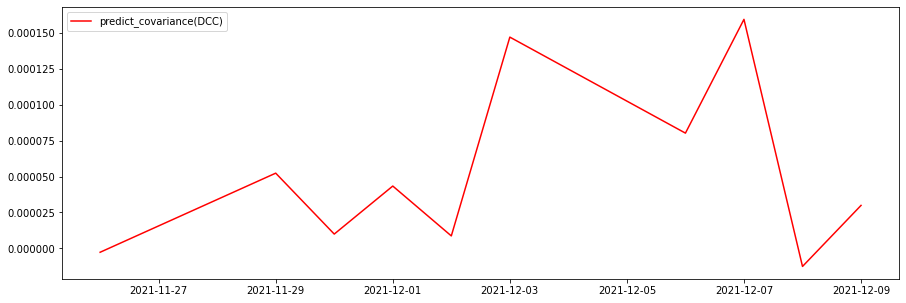

In [15]:
plt.figure(figsize=(15,5))
x=test.index
plt.plot(x,pre3,'r',label='predict_covariance(DCC)')
plt.legend()
plt.show()